In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

In [2]:
titanic = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/Titanic_train.csv")
titanic = titanic.dropna()

In [4]:
#selecionando os dummies para fazer as previsões futuramente
titanic["Pclass"] = titanic["Pclass"].astype(str)
x = pd.get_dummies(titanic[["Pclass", "Sex", "Age"]], drop_first = True)
y = titanic["Survived"]
x.head()

,Age,Pclass_2,Pclass_3,Sex_male
1,38.0,0,0,0
3,35.0,0,0,0
6,54.0,0,0,1
10,4.0,0,1,0
11,58.0,0,0,0


In [5]:
# Definindo a regressão
log_reg = sm.Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.580971
         Iterations 6


In [6]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  183
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            3
Date:                Wed, 31 Jan 2024   Pseudo R-squ.:                 0.08170
Time:                        11:02:05   Log-Likelihood:                -106.32
converged:                       True   LL-Null:                       -115.78
Covariance Type:            nonrobust   LLR p-value:                 0.0002843
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0352      0.007      5.068      0.000       0.022       0.049
Pclass_2       1.5822      0.740      2.138      0.033       0.131       3.033
Pclass_3       0.1364      0.695      0.196      0.845      -1.226       1.499
Sex_male      -1.7563      0.356     -4.935      0.000      -2.454      -1.059
==============================================================================
"""

In [7]:
#Fazendo previsões
titanic["predito"] = log_reg.predict(x)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,predito
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.792352
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.774419
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.536617
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.568893
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0.885338


In [8]:
# confusion matrix analisando os acertos e erros do modelo
pd.crosstab(titanic["Survived"], titanic["predito"] >.5)

predito,False,True
Survived,,
0,35,25
1,35,88


In [9]:
# Usando outra biblioteca para fazer as mesmas previsões
from sklearn.linear_model import LogisticRegression

In [10]:
clf = LogisticRegression(random_state=0).fit(x, y)
pd.crosstab(titanic["Survived"], clf.predict(x))


col_0,0,1
Survived,,
0,41,19
1,23,100


In [11]:
clf.predict(x)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1])

In [12]:
# a função da as probabilidades de morrer e de sobreviver, estamos selecionando apenas a de sobreviver
titanic["preditos2"] = clf.predict_proba(x)[:, 1]
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,predito,preditos2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.792352,0.902397
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.774419,0.910785
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.536617,0.343899
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.568893,0.911741
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0.885338,0.826846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0.839745,0.872898
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0.355871,0.511943
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0.877986,0.836102
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.661409,0.945413


In [13]:
# testando a confusion matrix dessa biblioteca
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(titanic["Survived"], clf.predict(x))

array([[ 41,  19],
       [ 23, 100]])

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
# essa biblioteca tem todas as medidas que dão para ser descobertas a partir da confusion matrix
accuracy_score(titanic["Survived"], clf.predict(x))

0.7704918032786885

In [17]:
from sklearn.metrics import f1_score

In [18]:
f1_score(titanic["Survived"], clf.predict(x))

0.8264462809917354

In [19]:
clf.predict_proba(pd.DataFrame({"Age":41, "Pclass_2":0, "Pclass_3":0, "Sex_male":1}, index=[0]))

array([[0.55391567, 0.44608433]])

In [20]:
titanic.groupby("Sex")["Survived"].mean()

Sex
female    0.931818
male      0.431579
Name: Survived, dtype: float64

In [21]:
# usar as ramificações de bayes testando qual modelo irá ter a menor chance de errar
from sklearn import tree

arvore = tree.DecisionTreeClassifier(max_depth = 3)
arvore = arvore.fit(x, y)

[Text(0.4444444444444444, 0.875, 'x[3] <= 0.5\ngini = 0.441\nsamples = 183\nvalue = [60, 123]'),
 Text(0.2222222222222222, 0.625, 'x[0] <= 3.0\ngini = 0.127\nsamples = 88\nvalue = [6, 82]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.375, 'x[2] <= 0.5\ngini = 0.089\nsamples = 86\nvalue = [4, 82]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.07\nsamples = 82\nvalue = [3, 79]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6666666666666666, 0.625, 'x[0] <= 17.5\ngini = 0.491\nsamples = 95\nvalue = [54, 41]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.7777777777777778, 0.375, 'x[0] <= 43.0\ngini = 0.471\nsamples = 87\nvalue = [54, 33]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.499\nsamples = 48\nvalue = [25, 23]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.381\nsamples = 39\nvalue = [29, 10]')]

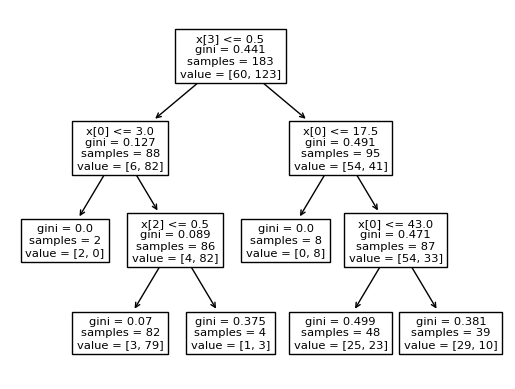

In [22]:
tree.plot_tree(arvore)

In [23]:
from sklearn.ensemble import RandomForestClassifier

floresta = RandomForestClassifier(max_depth = 3, random_state = 0)
floresta = floresta.fit(x, y)
floresta.predict(pd.DataFrame({'Age':80,	'Pclass_2':0,	'Pclass_3':1,	'Sex_male':0},index=[0]))

array([1])

In [25]:
pd.crosstab(titanic["Survived"], floresta.predict(x))

col_0,0,1
Survived,,
0,42,18
1,19,104
